# Heat equation

## libs

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML

## initialization

In [88]:
check=0.5

LAMBDA0 = 0.5
SIGMA = 0.2
LENGTH = 15
DURATION = 50
INITIAL = 0
BOUND = 0.5

NUMBER_X = 50
NUMBER_T = int(LAMBDA0 * DURATION * NUMBER_X**2 / LENGTH**2 / check)
C = np.sqrt(np.power(BOUND, SIGMA) * LAMBDA0 / SIGMA)

In [89]:
step_x = LENGTH / (NUMBER_X - 1)
step_t = DURATION / (NUMBER_T - 1)

In [90]:
axis = np.linspace(0, LENGTH, NUMBER_X)
time = np.linspace(0, DURATION, NUMBER_T)

temperature = pd.DataFrame(columns = np.concatenate([['x'], time]))

In [91]:
temperature['x'] = axis
temperature = temperature.set_index('x')

In [92]:
lambdas = temperature.copy()

In [93]:
temperature.iloc[:, 0] = INITIAL
temperature.iloc[0] = BOUND * np.power(time, SIGMA)
temperature.iloc[NUMBER_X-1, :] = INITIAL

In [94]:
lambdas = LAMBDA0 * np.power(temperature, SIGMA)

## main procedure

In [95]:
C

1.4752546926684593

In [96]:
def get_lambdas(lambdas, t, x):
    if (C * t *  step_t > x *step_x + 5) & (C * t *  step_t < x *step_x - 5):
        lambda_plus = 2 * lambdas.iloc[x, t] * lambdas.iloc[x+1, t] / (lambdas.iloc[x, t] + lambdas.iloc[x+1, t])
        lambda_minus = 2 * lambdas.iloc[x, t] * lambdas.iloc[x-1, t] / (lambdas.iloc[x, t] + lambdas.iloc[x-1, t])  
    else:
        lambda_plus = (lambdas.iloc[x, t] + lambdas.iloc[x+1, t]) / 2
        lambda_minus = (lambdas.iloc[x, t] + lambdas.iloc[x-1, t]) / 2     
    return lambda_plus, lambda_minus

In [97]:
pbar = tqdm_notebook(total = NUMBER_T - 1)

for t in range(0, NUMBER_T - 1):
    for x in range(1, NUMBER_X - 1):
        lambda_plus, lambda_minus = get_lambdas(lambdas, t, x)

        second_derivative = (lambda_plus * (temperature.iloc[x+1, t] - temperature.iloc[x, t]) - 
                             lambda_minus * (temperature.iloc[x, t] - temperature.iloc[x-1, t])) / step_x**2
        
        temperature.iloc[x, t+1] = step_t * second_derivative + temperature.iloc[x, t]
        
    lambdas.iloc[:, t+1] = LAMBDA0 * np.power(temperature.iloc[:, t+1], SIGMA)
        
    pbar.update()

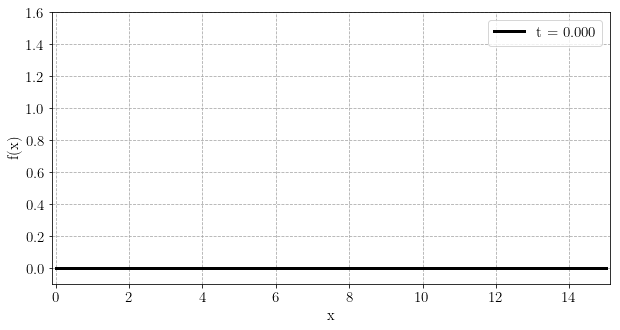

In [98]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([-0.1, LENGTH + 0.1, -0.1, BOUND + 1.1])

l1, = ax.plot(temperature.index, temperature.iloc[:, NUMBER_T - 1], lw=3, color='black', label=NUMBER_T)
#l2, = ax.plot([ LAMBDA * float(function.columns[20]), LAMBDA * float(function.columns[20])],[0, BOUND], lw=3, color='blue', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(temperature.index, temperature.iloc[:, i])
    l1.set_label('t = ' + '%.3f' %(i * step_t))
    #l2.set_data([A * float(function.columns[i+1]), A * float(function.columns[i+1])],[0, BOUND])

    legend = plt.legend(loc='upper right')
    return l1, #l2, legend

ani = animation.FuncAnimation(fig, animate, frames= np.arange(0, NUMBER_T - 1, 15), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())